In [1]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [5]:
#Loading data
bank = pd.read_csv("banking.csv")

In [6]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [7]:
bank.shape

(41188, 21)

# Data Pre-Processing

In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [9]:
#Statistical Analysis
bank.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [10]:
#Checking Missing values
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [11]:
#Checking for duplicates
bank.duplicated().sum()

12

In [12]:
#Investigating these 12 duplicates
bank[bank.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
17977,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
19339,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
24769,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
25634,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
28143,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,0
29352,71,retired,single,university.degree,no,no,no,telephone,oct,tue,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0
29936,45,admin.,married,university.degree,no,no,no,cellular,jul,thu,...,1,999,0,nonexistent,-2.9,92.469,-33.6,1.072,5076.2,1
34333,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
37154,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
39423,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,0


# Exploratory Data Analysis
Age Distribution

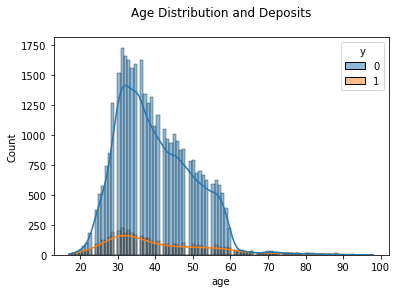

In [13]:
sns.histplot(x="age", data=bank, kde=True, hue= "y")
plt.title("Age Distribution and Deposits\n")
plt.show()

 
Maximum clients are between the age 30 - 40 and majority clients subscribing to Term Deposit also fall between these age groups.
# Distribution of Occupation

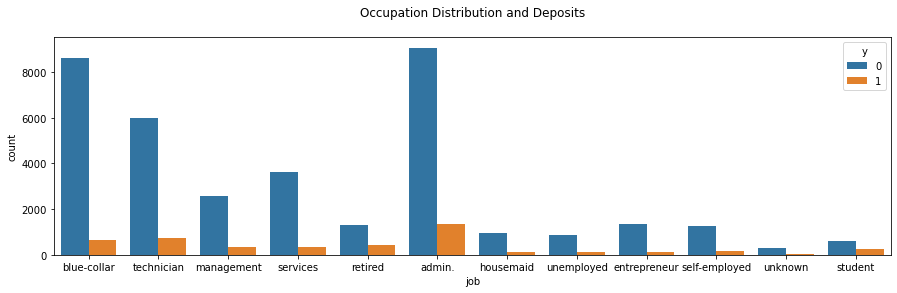

In [14]:
plt.figure(figsize=(15,4))
sns.countplot(x="job", data= bank, hue ="y")
plt.title("Occupation Distribution and Deposits\n")
plt.show()



Majority of clients have occupation "Admin", "blue-collar" or "Technician" and maximum clients subscribing to Term Deposit also are from these occupation.

# Distribution of Marital Status

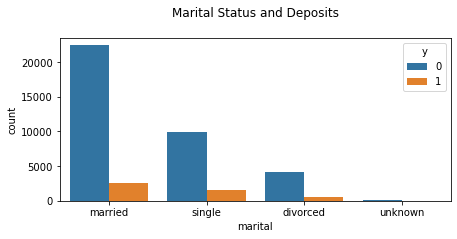

In [15]:
plt.figure(figsize=(7,3))
sns.countplot(x="marital", data= bank, hue ="y")
plt.title("Marital Status and Deposits\n")
plt.show()


Clients are mostly married
# Distribution of Education Status

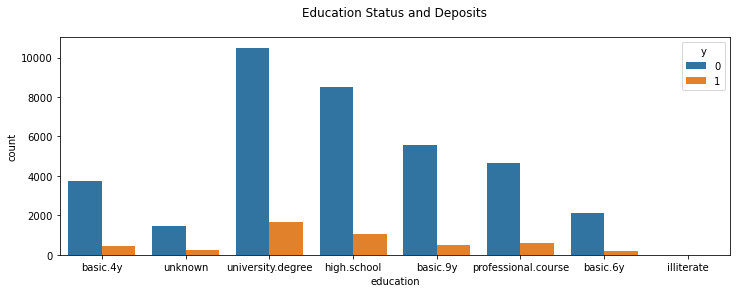

In [16]:
plt.figure(figsize=(12,4))
sns.countplot(x="education", data= bank, hue ="y")
plt.title("Education Status and Deposits\n")
plt.show()

Most of the clients have University degree and have studied high or professional course.

# Credit defaults - any ?

In [17]:
bank.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

Majority of clients do not have any Credit defaults. Only 3 clients have a Credit default
# Distribution of Housing Loan

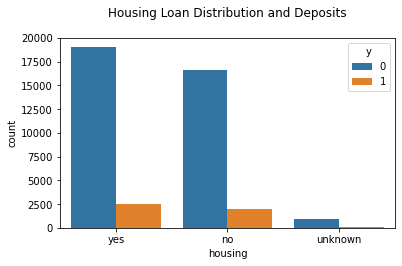

In [18]:
plt.figure(figsize=(6,3.5))
sns.countplot(x="housing", data= bank, hue ="y")
plt.title("Housing Loan Distribution and Deposits\n")
plt.show()

Clients subscribing to Term Deposits mostly have Home loan
# Distribution of Personal Loan

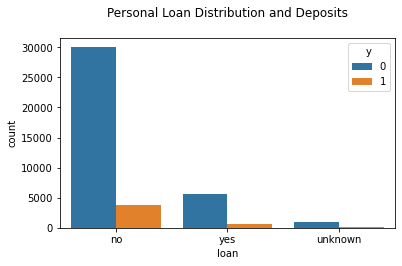

In [19]:
plt.figure(figsize=(6,3.5))
sns.countplot(x="loan", data= bank, hue ="y")
plt.title("Personal Loan Distribution and Deposits\n")
plt.show()

Most of the Clients subscribing to Term Deposits dont have personal loan
# Distribution of Outcome (Term Deposits)

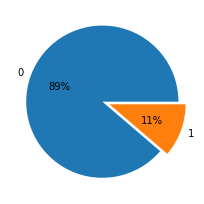

In [20]:
#Count of Outcome
bank.y.value_counts()
keys = bank.y.value_counts().index
data = bank.y.value_counts().values
plt.figure(figsize=(6,3.5))
explode = [0,0.1]
plt.pie(data,labels=keys,explode=explode, autopct='%.0f%%')
plt.show()

11% of clients have subscribed to Term Deposit

Let us now prepare our data for Model building

# Label Encoding Categorical Features

In [21]:
cols = bank.select_dtypes("object").columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [22]:
le = LabelEncoder()

bank[cols] = bank[cols].apply(le.fit_transform)

In [23]:
bank.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,1,0,1,2,0,0,1,2,...,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53,9,1,7,0,0,0,0,7,0,...,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,2,6,0,2,0,0,4,2,...,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6,1


# Correlation Analysis using Heatmap

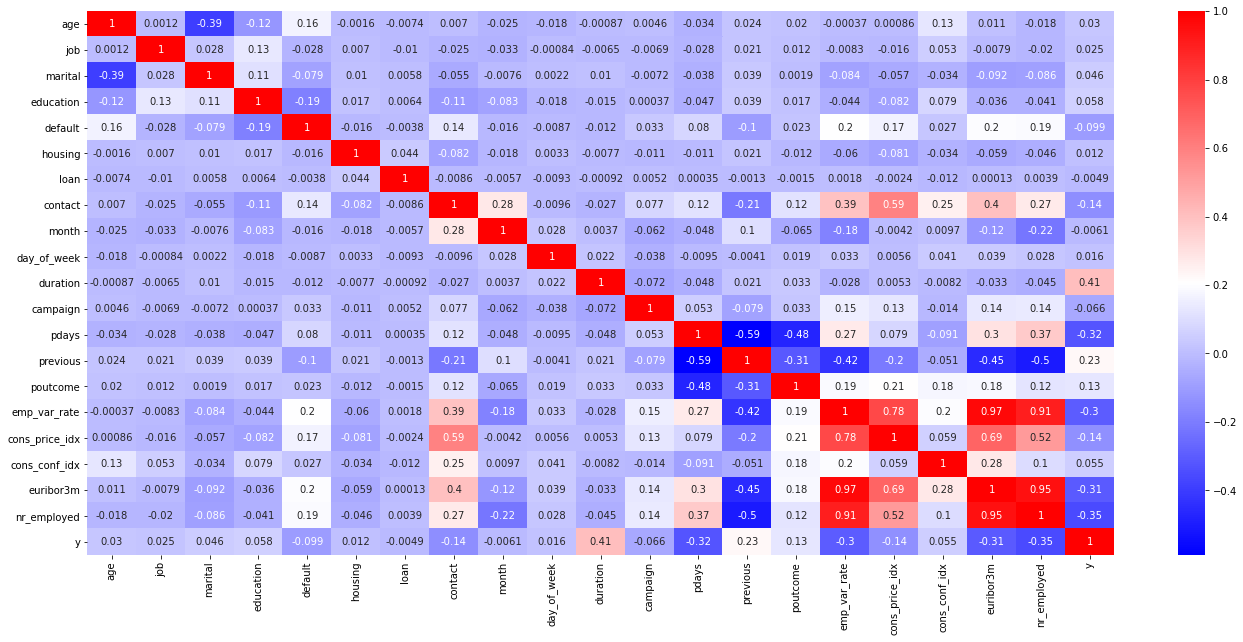

In [24]:
plt.figure(figsize=(23,10))
sns.heatmap(bank.corr(), cmap='bwr', annot=True)
plt.show()

1 Outcome "y" is positively correlated with duration of call and also shows slight correlation with previous attempts of call. This implies that clients went ahead with Term deposits subscription after gaining sufficient insights from bank calls and persuation.

2 multicolinearty can be seen among some input features. This can be handled by dropping those variables or by performing LDA(Linear discriminant analysis) on the data.



# Standardisation

In [25]:
#Splitting input and output
X = bank.drop("y", axis=1)
y = bank.y

In [26]:
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

# Model building - Decision Tree Classifier

In [27]:
#Train-test split
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.3)

In [28]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)

DecisionTreeClassifier()

In [29]:
print('Train Score: {}'.format(decision_tree.score(train_X, train_y)))
print('Test Score: {}'.format(decision_tree.score(test_X, test_y)))

Train Score: 1.0
Test Score: 0.885975560411103


In [30]:
cross_val_score(decision_tree, train_X, train_y, cv=5).mean()

0.888522644989153

In [31]:
ypred = decision_tree.predict(test_X)
print(classification_report(test_y,ypred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     10970
           1       0.49      0.53      0.51      1387

    accuracy                           0.89     12357
   macro avg       0.72      0.73      0.72     12357
weighted avg       0.89      0.89      0.89     12357



# Hyperparameter tunning

In [32]:
#Applying Grid search cv to find best estimaters to improve model performance

param_grid = {
    'max_depth': [3, 5, 7,10, None],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf': [3, 5, 7, 9,10,20]
}

In [33]:
gscv = GridSearchCV(decision_tree, param_grid, cv=5, verbose=1)
gscv.fit(train_X, train_y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [3, 5, 7, 9, 10, 20]},
             verbose=1)

In [34]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3}

In [35]:
gscv.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [36]:
cross_val_score(gscv.best_estimator_, train_X, train_y, cv=5).mean()

0.9125941364688067

In [37]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf = 3)
clf.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [38]:
print('Train Score: {}'.format(clf.score(train_X, train_y)))
print('Test Score: {}'.format(clf.score(test_X, test_y)))

Train Score: 0.9162706808643474
Test Score: 0.9131666262037711


In [39]:
pred_y = clf.predict(test_X)

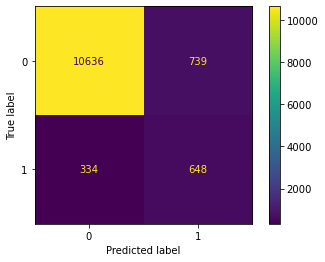

In [40]:
#Confusion Matrix
cm = confusion_matrix(pred_y, test_y)
ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()
plt.show()

In [41]:
#Classification Report
print(classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95     11375
           1       0.47      0.66      0.55       982

    accuracy                           0.91     12357
   macro avg       0.72      0.80      0.75     12357
weighted avg       0.93      0.91      0.92     12357



In [42]:
#Accuracy Score
accuracy = accuracy_score(test_y,pred_y)
print("Test Accuracy of Decision Tree Classifier : {}".format(accuracy*100))

Test Accuracy of Decision Tree Classifier : 91.31666262037712


In [43]:
#Cross Validation Score
Cross_val = cross_val_score(clf, test_X,test_y, cv=5).mean()
print("Cross-Validation Accuracy Scores Decision Tree : ",Cross_val*100)

Cross-Validation Accuracy Scores Decision Tree :  91.34094656592525


# Visualizing the Tree

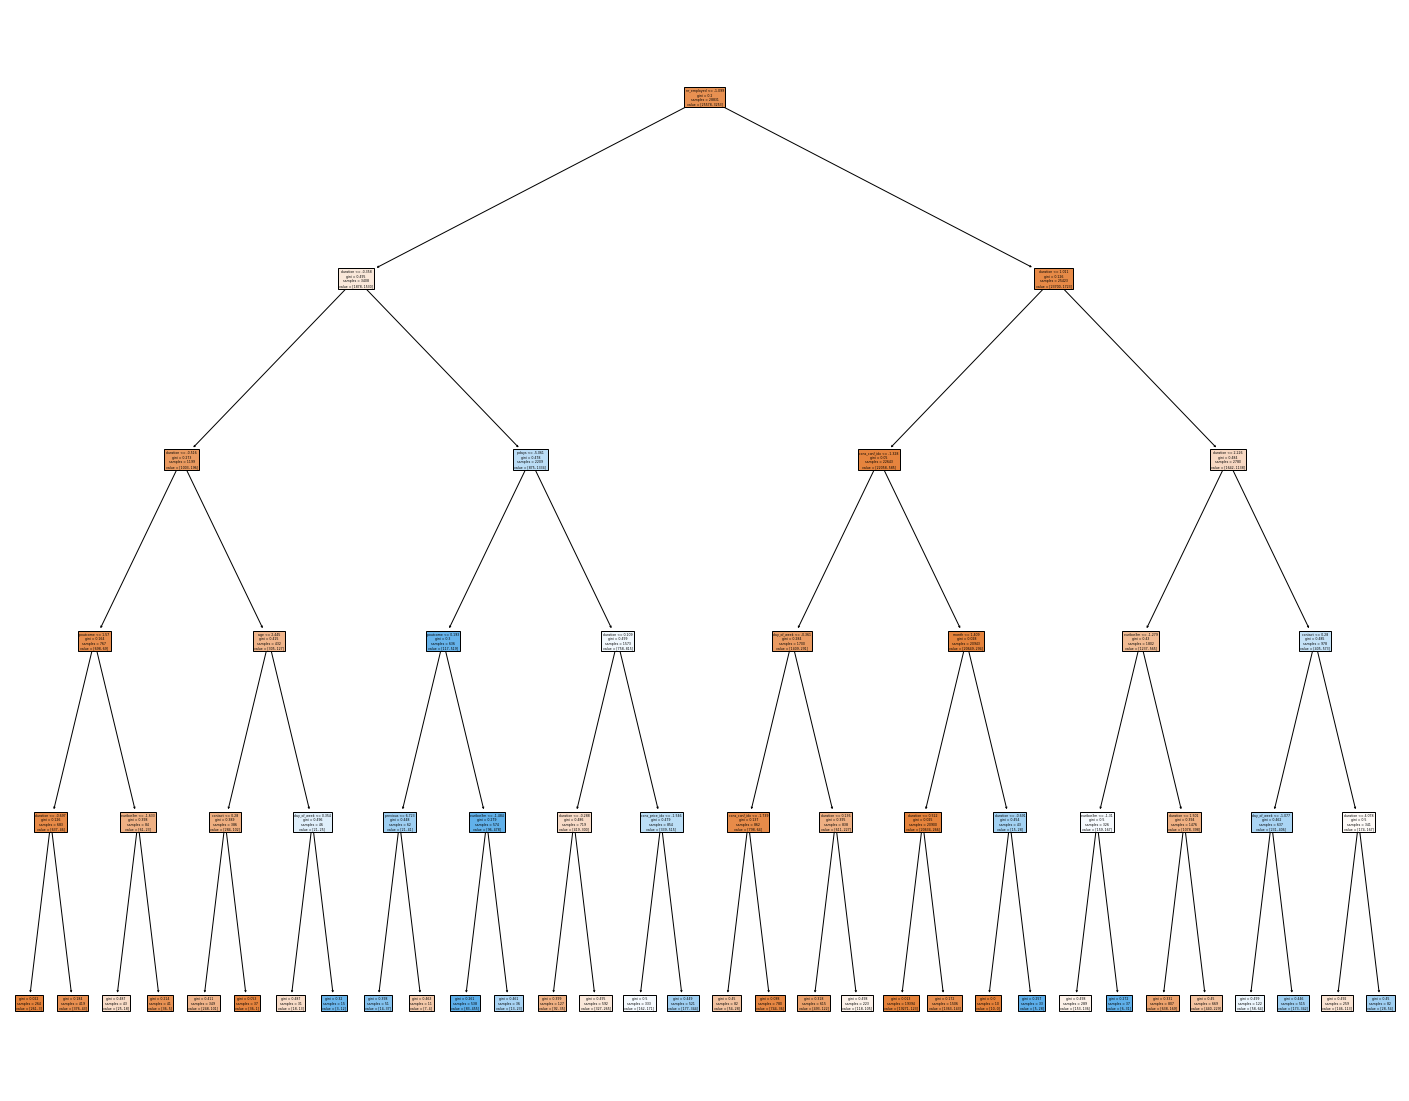

In [44]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
t= tree.plot_tree(clf,filled=True,feature_names=X.columns)